In [1]:
import json as js

rec = []
for line in open('./data/job7r4A162.json', 'r'):
    rec.append(js.loads(line))

rec[0], len(rec)

({'century': '234',
  'coordinate': [],
  'corporate': [],
  'decade': '234',
  'doi': '',
  'edition': '',
  'exactDate': '',
  'format': 'BK020053',
  'isbn': '',
  'ismn': '',
  'musicid': '',
  'pages': ['20712'],
  'part': ['20712'],
  'person': ['Foerster',
   'Stephen',
   'Verfasser',
   'aut',
   'Linnainmaa',
   'Juhani T.',
   'Verfasser',
   'aut',
   'Melzer',
   'Brian T.',
   'Verfasser',
   'aut',
   'Previtero',
   'Alessandro',
   'Verfasser',
   'aut',
   'Stephen Foerster, Juhani T. Linnainmaa, Brian T. Melzer, Alessandro Previtero'],
  'pubinit': '',
  'pubword': [],
  'pubyear': '',
  'scale': '',
  'ttlfull': ['Retail Financial Advice',
   'das ist ein fake',
   'Does One Size Fit All?'],
  'ttlpart': ['Retail Financial Advice',
   'das ist ein fake',
   'Does One Size Fit All?'],
  'volumes': '1 Online-Ressource'},
 126921)

In [2]:
rec[0]['ttlfull']

['Retail Financial Advice', 'das ist ein fake', 'Does One Size Fit All?']

In [3]:
rec[0]['ttlpart']

['Retail Financial Advice', 'das ist ein fake', 'Does One Size Fit All?']

In [4]:
rec_ttlfull = [rec[i]['ttlfull'] for i in range(len(rec))]
# Generates a list of list :-(
rec_ttlfull[:5]

[['Retail Financial Advice', 'das ist ein fake', 'Does One Size Fit All?'],
 ['Retail Food Safety'],
 ['Retail Globalization and Household Welfare', 'Evidence from Mexico'],
 ['Retail Pricing and Clearance Sales'],
 ['Retaking in High Stakes Exams', 'Is Less More?']]

In [5]:
import numpy as np

list_ttlfull = []
for i in range(len(rec)):
#    print(rec[i]['ttlfull'], len(rec[i]['ttlfull']))
    j_level = ''
    for j in range(len(rec[i]['ttlfull'])):
        j_level += rec[i]['ttlfull'][j] + ' '
#        print(j_level)
    list_ttlfull.append(j_level)

list_ttlfull[:5]

['Retail Financial Advice das ist ein fake Does One Size Fit All? ',
 'Retail Food Safety ',
 'Retail Globalization and Household Welfare Evidence from Mexico ',
 'Retail Pricing and Clearance Sales ',
 'Retaking in High Stakes Exams Is Less More? ']

In [6]:
arr_ttlfull = np.array(list_ttlfull)
arr_ttlfull[:5]

array(['Retail Financial Advice das ist ein fake Does One Size Fit All? ',
       'Retail Food Safety ',
       'Retail Globalization and Household Welfare Evidence from Mexico ',
       'Retail Pricing and Clearance Sales ',
       'Retaking in High Stakes Exams Is Less More? '], dtype='<U1212')

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
X_enc = vect.fit_transform(arr_ttlfull)

In [8]:
vect.vocabulary_

{'retail': 86769,
 'financial': 38326,
 'advice': 5680,
 'das': 26845,
 'ist': 53161,
 'ein': 32666,
 'fake': 37057,
 'does': 30683,
 'one': 72524,
 'size': 93160,
 'fit': 38528,
 'all': 6914,
 'food': 39295,
 'safety': 89046,
 'globalization': 42861,
 'and': 8086,
 'household': 47815,
 'welfare': 109390,
 'evidence': 36042,
 'from': 40103,
 'mexico': 63854,
 'pricing': 81253,
 'clearance': 22176,
 'sales': 89160,
 'retaking': 86779,
 'in': 50391,
 'high': 46810,
 'stakes': 95612,
 'exams': 36146,
 'is': 52808,
 'less': 58277,
 'more': 66139,
 'rethinking': 86800,
 'performance': 76436,
 'evaluation': 35968,
 'platinum': 78911,
 'anticancer': 8840,
 'drug': 31327,
 'design': 28196,
 'towards': 102286,
 'targeted': 99233,
 'immuno': 50059,
 'chemotherapeutic': 20929,
 'approaches': 9570,
 'sovereign': 94325,
 'debt': 27113,
 'review': 87006,
 'to': 101870,
 'forgive': 39418,
 'forget': 39414,
 'the': 100563,
 'role': 88000,
 'of': 72082,
 'nairu': 68041,
 'monetary': 65761,
 'policy': 7

In [9]:
X_enc[:5]

<5x112994 sparse matrix of type '<class 'numpy.int64'>'
	with 36 stored elements in Compressed Sparse Row format>

In [10]:
from sklearn.decomposition import PCA

#pca = PCA(n_components=None)
#pca.fit_transform(X_enc)
# Does not work with a sparse matrix

In [11]:
from sklearn.decomposition import TruncatedSVD

nnn = 100
tsvd = TruncatedSVD(n_components=nnn)
tsvd.fit_transform(X_enc)

array([[ 1.35086987e-02,  4.56307367e-03,  5.92858189e-03, ...,
        -6.56253334e-02,  3.80240214e-02, -3.89233092e-02],
       [ 4.59013365e-03,  4.08947613e-03,  3.14453296e-04, ...,
         4.50270011e-03,  1.97193415e-03, -1.56533561e-02],
       [ 4.30174677e-01,  7.62089777e-01, -3.70010628e-01, ...,
         3.39770802e-02,  3.57600474e-02,  2.49988620e-02],
       ...,
       [ 1.85030929e+00,  4.03123419e-01,  4.39059161e-01, ...,
         5.02114993e-02, -5.20095160e-02,  1.95791392e-02],
       [ 1.12784522e+00,  1.57706301e+00,  1.13718956e+00, ...,
         1.86197466e-02,  2.80137906e-02,  1.94745414e-02],
       [ 7.35997320e-01,  1.17685192e+00,  3.92937681e-01, ...,
         1.92930426e-02,  6.45836971e-04,  8.78192491e-02]])

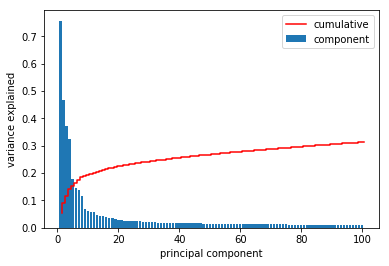

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

ticks = np.arange(1, nnn + 1) # 1, 2, ..., n_components
tsvd_cum = np.cumsum(tsvd.explained_variance_ratio_)

plt.bar(ticks, tsvd.explained_variance_, label='component')
plt.step(
    ticks+0.5, # 1.5, 2.5, ..., n_components+0.5
    tsvd_cum, # Cumulative sum
    color='red',
    label='cumulative'
    )
plt.xlabel('principal component')
plt.ylabel('variance explained')
plt.legend()
plt.show()